In [1]:
# importing libraries
import statsmodels.formula.api as smf  # logistic regression
import numpy             as np        # importing numpy
import pandas            as pd       # data science essentials
from sklearn.metrics import confusion_matrix # confusion matrix
from sklearn.metrics import roc_auc_score   # auc score
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.ensemble import RandomForestClassifier    #randomforest classification
from sklearn.ensemble import GradientBoostingClassifier#GBM classifier 
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                # customizable scorer
from sklearn.neighbors import KNeighborsClassifier     # KNN for classification
from sklearn.neighbors import KNeighborsRegressor      # KNN for regression
from sklearn.preprocessing import StandardScaler       # standard scaler
from sklearn.tree import DecisionTreeClassifier        # classification trees
from sklearn.tree import plot_tree                     # tree plots



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying file name
file = './GOT_character_predictions.xlsx'


# reading the file into Python
GOT_df = pd.read_excel(file)


# outputting the first ten rows of the dataset
GOT_df.head(n = 15)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [5]:
import random as rand                                  # random number generation
import gender_guesser.detector as gender               # guess gender based on (given) name

# this code is for the gender_guess 

# setting random seed
rand.seed(a = 327)
# STEP 1: splitting names

# placeholder list
placeholder_lst = []

# looping over each name
for index, col in GOT_df.iterrows():
    
    # splitting email domain at '@'
    split_name = GOT_df.loc[index, 'name'].split(sep = ' ')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_name)
    

# converting placeholder_lst into a DataFrame 
name_GOT_df = pd.DataFrame(placeholder_lst)


# displaying the results
name_GOT_df

,0,1,2,3,4,5
0,Viserys,II,Targaryen,None,None,None
1,Walder,Frey,None,None,None,None
2,Addison,Hill,None,None,None,None
3,Aemma,Arryn,None,None,None,None
4,Sylva,Santagar,None,None,None,None
...,...,...,...,...,...,...
1941,Luwin,None,None,None,None,None
1942,Reek,None,None,None,None,None
1943,Symeon,Star-Eyes,None,None,None,None
1944,Coldhands,None,None,None,None,None


In [6]:
#Getting the first_name column
# STEP 2: concatenating with original DataFrame
first_name = name_GOT_df[0]
print(first_name)

0         Viserys
1          Walder
2         Addison
3           Aemma
4           Sylva
          ...    
1941        Luwin
1942         Reek
1943       Symeon
1944    Coldhands
1945        Tytos
Name: 0, Length: 1946, dtype: object


In [7]:
#     ### guessing gender based on (given) name

#     # placeholder list
#     placeholder_lst = []


#     # looping to guess gender
#     for name in first_name:
#         guess = gender.Detector().get_gender(name)
#         print(guess)
#         placeholder_lst.append(guess)


#     # converting list into a series
#     gender_guess = pd.Series(placeholder_lst)


#     # checking results
#     print(gender_guess)

In [8]:
list =      ['unknown', 'unknown', 'andy', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male',
                     'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'unknown', 'female',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 'andy',
                     'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'unknown', 'male', 'male', 'male', 'male',
                     'male', 'male', 'male', 'mostly_male', 'male', 'mostly_male', 'mostly_male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'mostly_male', 'unknown', 'unknown', 'male', 'female', 'andy', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'mostly_female', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                     'unknown', 'unknown', 'andy', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'female', 'female',
                     'female', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female',
                     'unknown', 'mostly_female', 'female', 'unknown', 'mostly_female', 'unknown', 'female', 'unknown',
                     'female', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'male', 'male', 'male', 'male',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                     'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male',
                     'female', 'male', 'male', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown',
                     'unknown', 'male', 'male', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'andy', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'female', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'female', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
                     'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male',
                     'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                     'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female',
                     'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
                     'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female',
                     'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown',
                     'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown',
                     'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male',
                     'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female',
                     'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male',
                     'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female',
                     'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown',
                     'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female',
                     'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown',
                     'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown',
                     'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown',
                     'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male',
                     'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male',
                     'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male',
                     'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown',
                     'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female',
                     'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
                     'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male',
                     'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown',
                     'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 
                     'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown',
                     'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 
                     'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male',
                     'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown',
                     'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 
                     'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                     'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown',
                     'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown',
                     'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

In [9]:
# I am changing the lst into gender_guess
gender_guess = list

In [10]:
# I am adding the gender_guess column to GOT
GOT_df['gender_guess'] = gender_guess

In [11]:
GOT_df.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender_guess
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,unknown
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,andy
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,female


In [12]:
gender_guess_with_dummies = pd.get_dummies(GOT_df['gender_guess'])

In [14]:
GOT_df = GOT_df.join([gender_guess_with_dummies])
GOT_df.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,gender_guess,andy,female,male,mostly_female,mostly_male,unknown
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,unknown,0,0,0,0,0,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,unknown,0,0,0,0,0,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,andy,1,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,unknown,0,0,0,0,0,1
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,female,0,1,0,0,0,0


In [15]:
#Dropping from the columns of the dummy variable that i created in my data frame  GOT
GOT_df = GOT_df.drop(['female','mostly_female','mostly_male', 'andy','unknown', 'gender_guess'], axis = 1)

In [16]:
GOT_df.head()

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0


In [17]:
#running decscriptive statistics on number data of got
GOT_df.describe(include = 'number')

,S.No,dateOfBirth,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,male
count,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,26.000000,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,1577.364896,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,0.192308,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.089584,0.745632,0.195786
std,561.906131,19565.414460,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,0.401918,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.160568,0.435617,0.396907
min,1.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,240.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.013378,0.000000,0.000000
50%,973.500000,268.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.033445,1.000000,0.000000
75%,1459.750000,285.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.086957,1.000000,0.000000
max,1946.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000


In [18]:
#lookoing for missing values
GOT_df.isnull().any()

S.No                          False
name                          False
title                          True
culture                        True
dateOfBirth                    True
mother                         True
father                         True
heir                           True
house                          True
spouse                         True
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                  True
isAliveFather                  True
isAliveHeir                    True
isAliveSpouse                  True
isMarried                     False
isNoble                       False
age                            True
numDeadRelations              False
popularity                    False
isAlive                       False
male                          False
dtype: bool

In [19]:
#sum of missing values
GOT_df.isnull().sum(axis = 0)

S.No                             0
name                             0
title                         1008
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
male                             0
dtype: int64

In [20]:
# looping to detect features with missing values
for col in GOT_df:

    # creating columns with 1s if missing and 0 if not
    if GOT_df[col].isnull().astype(int).sum() > 0:
        GOT_df['m_'+col] = GOT_df[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
GOT_df[    ['m_title', 'm_culture','m_dateOfBirth','m_mother',
             'm_father','m_heir','m_house','m_spouse','m_isAliveMother',
             'm_isAliveFather','m_isAliveHeir','m_isAliveSpouse',
             'm_age']    ].sum(axis = 0)

m_title            1008
m_culture          1269
m_dateOfBirth      1513
m_mother           1925
m_father           1920
m_heir             1923
m_house             427
m_spouse           1670
m_isAliveMother    1925
m_isAliveFather    1920
m_isAliveHeir      1923
m_isAliveSpouse    1670
m_age              1513
dtype: int64

In [22]:
#imputing with the median for dateOfBirth,age
dateOfBirth_median = GOT_df['dateOfBirth'].median()
age_median         = GOT_df['age'].median()
GOT_df['dateOfBirth']    = GOT_df['dateOfBirth'].fillna(dateOfBirth_median)
GOT_df['age']            = GOT_df['age'].fillna(age_median)

#filling cateforical with unkown as mentioned in class

GOT_df['title']          = GOT_df['title'].fillna('unkown')
GOT_df['culture']        = GOT_df['culture'].fillna('unkown')
GOT_df['mother']         = GOT_df['mother'].fillna('unkown')
GOT_df['father']         = GOT_df['father'].fillna('unkown')
GOT_df['heir']           = GOT_df['heir'].fillna('unkown')
GOT_df['house']          = GOT_df['house'].fillna('unkown')
GOT_df['spouse']         = GOT_df['spouse'].fillna('unkown')

#filling them with 0 
GOT_df['isAliveMother']  = GOT_df['isAliveMother'].fillna(0)
GOT_df['isAliveFather']  = GOT_df['isAliveFather'].fillna(0)
GOT_df['isAliveHeir']    = GOT_df['isAliveHeir'].fillna(0)
GOT_df['isAliveSpouse']  = GOT_df['isAliveSpouse'].fillna(0)



In [23]:
#sum of missing values
GOT_df.isnull().sum(axis = 0)

S.No                          0
name                          0
title                         0
culture                       0
dateOfBirth                   0
mother                        0
father                        0
heir                          0
house                         0
spouse                        0
book1_A_Game_Of_Thrones       0
book2_A_Clash_Of_Kings        0
book3_A_Storm_Of_Swords       0
book4_A_Feast_For_Crows       0
book5_A_Dance_with_Dragons    0
isAliveMother                 0
isAliveFather                 0
isAliveHeir                   0
isAliveSpouse                 0
isMarried                     0
isNoble                       0
age                           0
numDeadRelations              0
popularity                    0
isAlive                       0
male                          0
m_title                       0
m_culture                     0
m_dateOfBirth                 0
m_mother                      0
m_father                      0
m_heir  

In [24]:
#correlation calculation
df_corr = GOT_df.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
m_isAliveFather               0.14
m_father                      0.14
m_mother                      0.14
m_isAliveMother               0.14
m_heir                        0.13
m_isAliveHeir                 0.13
age                           0.05
m_spouse                      0.05
m_isAliveSpouse               0.05
m_title                       0.04
m_house                       0.04
m_culture                     0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
male                         -0.01
isAliveSpouse                -0.01
isNoble                      -0.04
isAliveFather                -0.04
dateOfBirth                  -0.05
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.08
isAliveMother                -0.12
S.No                         -0.13
book1_A_Game_Of_Thro

In [25]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [26]:
# declaring explanatory variables
GOT_df_data   = GOT_df.drop(['isAlive'], axis = 1)


# declaring response variable
GOT_df_target = GOT_df.loc[ : , 'isAlive' ]

In [29]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            GOT_df_data,
            GOT_df_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_df_target) # preserving balance


# merging training data for statsmodels
GOT_df_data_train = pd.concat([x_train, y_train], axis = 1)

In [30]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



In [34]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ book4_A_Feast_For_Crows""",
                           data = GOT_df_data_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC


Optimization terminated successfully.
         Current function value: 0.534562
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
====================================================================
Model:               Logit             Pseudo R-squared:  0.057     
Dependent Variable:  isAlive           AIC:               1876.0368 
Date:                2021-12-04 21:46  BIC:               1886.9727 
No. Observations:    1751              Log-Likelihood:    -936.02   
Df Model:            1                 LL-Null:           -992.53   
Df Residuals:        1749              LLR p-value:       2.1241e-26
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      6.0000                                         
--------------------------------------------------------------------
                        Coef.  Std.Err.    z    P>|z|  [0.025 0.975]
--------------------------------------------------------------------
Intercept               0.4601   0.0765  6.0172 0.0000 0.3102 0.6100
book4_A_Feast_For_Crows 1.1895   0.1141 10.4212 0.0000 0.9658 1.4132
====================================================================

"""

In [35]:
#printing variables
for val in GOT_df_data:
    print(f" {val} + ")

 S.No + 
 name + 
 title + 
 culture + 
 dateOfBirth + 
 mother + 
 father + 
 heir + 
 house + 
 spouse + 
 book1_A_Game_Of_Thrones + 
 book2_A_Clash_Of_Kings + 
 book3_A_Storm_Of_Swords + 
 book4_A_Feast_For_Crows + 
 book5_A_Dance_with_Dragons + 
 isAliveMother + 
 isAliveFather + 
 isAliveHeir + 
 isAliveSpouse + 
 isMarried + 
 isNoble + 
 age + 
 numDeadRelations + 
 popularity + 
 male + 
 m_title + 
 m_culture + 
 m_dateOfBirth + 
 m_mother + 
 m_father + 
 m_heir + 
 m_house + 
 m_spouse + 
 m_isAliveMother + 
 m_isAliveFather + 
 m_isAliveHeir + 
 m_isAliveSpouse + 
 m_age + 


In [46]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~
                                                     dateOfBirth +
                                                     book1_A_Game_Of_Thrones + 
                                                     book2_A_Clash_Of_Kings + 
                                                     book3_A_Storm_Of_Swords + 
                                                     book4_A_Feast_For_Crows + 
                                                     age + 
                                                     popularity
                                                                                                         """,
                                        data    = GOT_df_data_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary2()

Optimization terminated successfully.
         Current function value: 0.435888
         Iterations 10


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
==========================================================================
Model:                 Logit               Pseudo R-squared:    0.231     
Dependent Variable:    isAlive             AIC:                 1542.4811 
Date:                  2021-12-04 21:48    BIC:                 1586.2247 
No. Observations:      1751                Log-Likelihood:      -763.24   
Df Model:              7                   LL-Null:             -992.53   
Df Residuals:          1743                LLR p-value:         6.3572e-95
Converged:             1.0000              Scale:               1.0000    
No. Iterations:        10.0000                                            
--------------------------------------------------------------------------
                         Coef.   Std.Err.    z    P>|z|   [0.025   0.975] 
--------------------------------------------------------------------------
Intercept               -62.7595   8.1140 -7.7347 0.0000 -78.6627 -46.8563
dateOfBirth               0.2168   0.0276  7.8705 0.0000   0.1628   0.2708
book1_A_Game_Of_Thrones  -0.6013   0.1608 -3.7402 0.0002  -0.9164  -0.2862
book2_A_Clash_Of_Kings   -0.6211   0.1451 -4.2815 0.0000  -0.9054  -0.3368
book3_A_Storm_Of_Swords  -0.4926   0.1509 -3.2644 0.0011  -0.7884  -0.1969
book4_A_Feast_For_Crows   1.3876   0.1497  9.2699 0.0000   1.0942   1.6809
age                       0.2169   0.0276  7.8714 0.0000   0.1629   0.2709
popularity               -2.7485   0.3964 -6.9329 0.0000  -3.5255  -1.9715
==========================================================================

"""

In [49]:
# train/test split with the full model
GOT_df_data   =  GOT_df.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                    'book2_A_Clash_Of_Kings',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows',
                                                         'popularity',
                                   'age',
                                   'dateOfBirth',
                                                         'numDeadRelations'] ]
GOT_df_target =  GOT_df.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            GOT_df_data,
            GOT_df_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = GOT_df_target)

# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy
# area under the roc curve (auc)
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                            y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Training ACCURACY: 0.7687
Testing  ACCURACY: 0.8103
AUC Score        : 0.6497


C:\Users\ABDALLAH BAZZAN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 16  34]
 [  3 142]]


In [51]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 16
False Positives: 34
False Negatives: 3
True Positives : 142



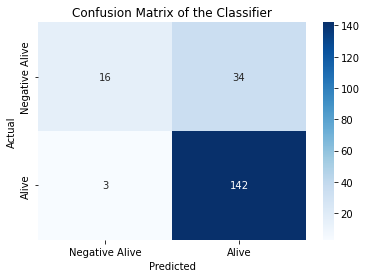

In [52]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Negative Alive', 'Alive'])

In [53]:
#WORKING WITH KNN MODEL
# train/test split with the full model
GOT_df_data   =  GOT_df.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                    'book2_A_Clash_Of_Kings',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows',
                                                         'popularity',
                                   'age',
                                   'dateOfBirth',
                                                         'numDeadRelations'] ]
GOT_df_target =  GOT_df.loc[ : , 'isAlive']


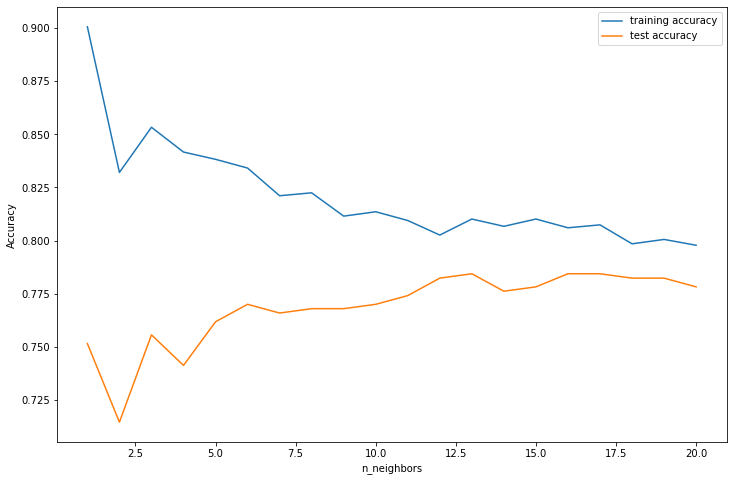

The optimal number of neighbors is: 13


In [54]:
########## MODEL FOR KNN #############
# determining the optimal number of neighbors
opt_neighbors = optimal_neighbors(x_data        = GOT_df_data,
                                  y_data        = GOT_df_target,
                                  response_type = 'class')

In [56]:
# INSTANTIATING StandardScaler()
scaler = StandardScaler()


# FITTING the data
scaler.fit(GOT_df_data)


# TRANSFORMING the data
x_scaled     = scaler.transform(GOT_df_data)


# converting to a DataFrame
x_scaled_df  = pd.DataFrame(x_scaled) 


# train-test split with the scaled data
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
            x_scaled_df,
            GOT_df_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_df_target)


# INSTANTIATING a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# FITTING the training data
knn_fit = knn_opt.fit(x_train_scaled, y_train_scaled)


# PREDICTING based on the testing set
knn_pred = knn_fit.predict(x_test_scaled)


# SCORING the results
print('Training ACCURACY:', knn_fit.score(x_train_scaled, y_train_scaled).round(4))
print('Testing  ACCURACY:', knn_fit.score(x_test_scaled, y_test_scaled).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4))


# saving scoring data
knn_train_score = knn_fit.score(x_train_scaled, y_train_scaled).round(4)
knn_test_score  = knn_fit.score(x_test_scaled, y_test_scaled).round(4)


# saving AUC score
knn_auc_score   = roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(4)

Training ACCURACY: 0.8001
Testing  ACCURACY: 0.8103
AUC Score        : 0.7086


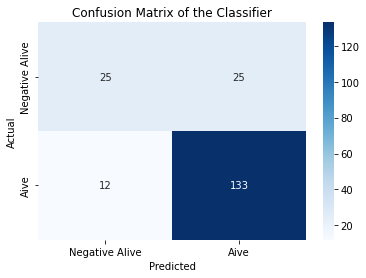

In [57]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = knn_pred,
          labels = ['Negative Alive', 'Aive'])

In [58]:
# unpacking the confusion matrix
knn_tree_tn, \
knn_tree_fp, \
knn_tree_fn, \
knn_tree_tp = confusion_matrix(y_true = y_test, y_pred = knn_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {knn_tree_tn}
False Positives: {knn_tree_fp}
False Negatives: {knn_tree_fn}
True Positives : {knn_tree_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 12
True Positives : 133



In [59]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [60]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.9075
Full Tree Testing ACCURACY : 0.8051
Full Tree AUC Score: 0.7379


In [61]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 18
True Positives : 127



In [62]:

# INSTANTIATING a classification tree object
pruned_tree = DecisionTreeClassifier(max_depth = 4,
                                     min_samples_leaf = 25,
                                     random_state = 219)


# FITTING the training data
pruned_tree_fit  = pruned_tree.fit(x_train, y_train)


# PREDICTING on new data
pruned_tree_pred = pruned_tree_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', pruned_tree_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', pruned_tree_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = pruned_tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = pruned_tree_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = pruned_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = pruned_tree_pred).round(4) # auc

Training ACCURACY: 0.7955
Testing  ACCURACY: 0.8154
AUC Score        : 0.64


In [63]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = pruned_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 14
False Positives: 36
False Negatives: 0
True Positives : 145



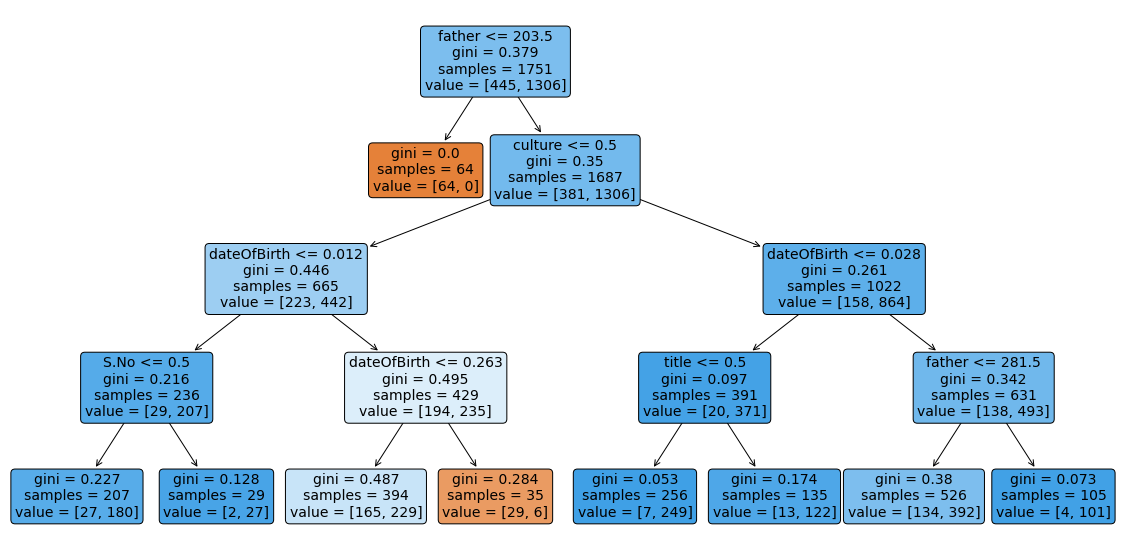

In [64]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = pruned_tree_fit, # changing to pruned_tree_fit
          feature_names = GOT_df.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

In [65]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Full Tree     {full_tree_auc_score}          {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}           {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, full_tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, full_tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6497         (16, 34, 3, 142)
Full Tree     0.7379          (30, 20, 18, 127)
Pruned Tree   0.64           (14, 36, 0, 145)



In [66]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [68]:
#RANDOM FOREST MODEL
# train/test split with the full model
GOT_df_data   =  GOT_df.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                    'book2_A_Clash_Of_Kings',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows',
                                                         'popularity',
                                   'age',
                                   'dateOfBirth',
                                                         'numDeadRelations'] ]
GOT_df_target =  GOT_df.loc[ : , 'isAlive']

# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            GOT_df_data,
            GOT_df_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_df_target)

In [69]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [70]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.9075
Testing  ACCURACY: 0.8615
AUC Score        : 0.7955


In [71]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 10
True Positives : 135



In [72]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (Full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6497,0.7687,0.8103,"(16, 34, 3, 142)"
1,Full Tree,0.7379,0.9075,0.8051,"(30, 20, 18, 127)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.7955,0.9075,0.8615,"(33, 17, 10, 135)"


In [73]:
#GBM MODEL 
GOT_df_data   =  GOT_df.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                    'book2_A_Clash_Of_Kings',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows',
                                                         'popularity',
                                   'age',
                                   'dateOfBirth',
                                                         'numDeadRelations'] ]
GOT_df_target =  GOT_df.loc[ : , 'isAlive']


In [74]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            GOT_df_data,
            GOT_df_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_df_target)

In [75]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8612
Testing ACCURACY : 0.8667
AUC Score        : 0.7793


In [76]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 30
False Positives: 20
False Negatives: 6
True Positives : 139



In [77]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6497,0.7687,0.8103,"(16, 34, 3, 142)"
1,Full Tree,0.7379,0.9075,0.8051,"(30, 20, 18, 127)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.7955,0.9075,0.8615,"(33, 17, 10, 135)"
4,GBM (Full),0.7793,0.8612,0.8667,"(30, 20, 6, 139)"


In [78]:
# I HAVE A GOOD MODEL FOR GBM and Random Forest
# I want to do hyperparameter tuning for Random FOrest 
#GBM MODEL 
GOT_df_data   =  GOT_df.loc[ : ,  [  'book1_A_Game_Of_Thrones',
                                    'book2_A_Clash_Of_Kings',
                                                         'book3_A_Storm_Of_Swords', 
                                                         'book4_A_Feast_For_Crows',
                                                         'popularity',
                                   'age',
                                   'dateOfBirth',
                                                         'numDeadRelations'] ]
GOT_df_target =  GOT_df.loc[ : , 'isAlive']


In [79]:
# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            GOT_df_data,
            GOT_df_target,
            random_state = 219,
            test_size    = 0.10,
            stratify     = GOT_df_target)

In [81]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_range  = np.arange(100, 1100, 250)
leaf_range       = np.arange(1, 31, 10)
criterion_range  = ['gini', 'entropy']
bootstrap_range  = [True, False]
warm_start_range = [True, False]


# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_range,
              'min_samples_leaf' : leaf_range,
              'criterion'        : criterion_range,
              'bootstrap'        : bootstrap_range,
              'warm_start'       : warm_start_range}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 1000,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(GOT_df_data, GOT_df_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

C:\Users\ABDALLAH BAZZAN\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 96 is smaller than n_iter=1000. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'warm_start': True, 'n_estimators': 350, 'min_samples_leaf': 1, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.6942


In [82]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, n_estimators=350, random_state=219,
                       warm_start=True)

In [132]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = RandomForestClassifier(criterion        = 'gini',
                                      min_samples_leaf = 6,
                                      n_estimators     = 350,
                                      warm_start       = True,
                                      bootstrap        = False,
                                      random_state     = 219)


# FITTING to the FULL DATASET (due to cross-validation)
forest_tuned_fit = forest_tuned.fit(GOT_df_data, GOT_df_target)


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned_fit.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.8458
Forest Tuned Testing  ACCURACY: 0.8974
Forest Tuned AUC Score        : 0.8197


In [124]:
## IHAVE 0.8866 for the best AUC for my best model
## THIS IS THE BEST MODEL I HAVe for my data


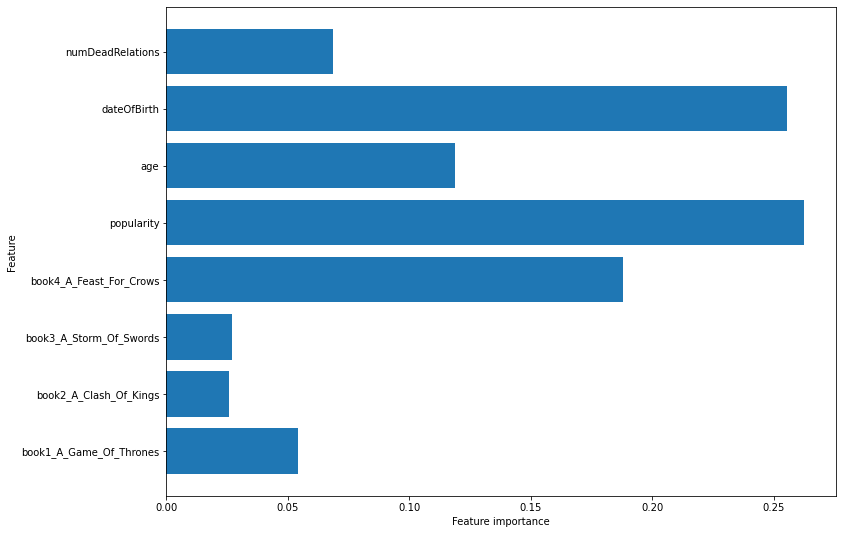

In [125]:
# plotting feature importances
plot_feature_importances(forest_tuned_fit,
                         train = x_train,
                         export = False)

In [126]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 33
False Positives: 17
False Negatives: 2
True Positives : 143



In [127]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned_fit.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned_fit.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6497,0.7687,0.8103,"(16, 34, 3, 142)"
1,Full Tree,0.7379,0.9075,0.8051,"(30, 20, 18, 127)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"
3,Random Forest (Full),0.7955,0.9075,0.8615,"(33, 17, 10, 135)"
4,GBM (Full),0.7793,0.8612,0.8667,"(30, 20, 6, 139)"
5,Tuned Random Forest (Full),0.8866,0.8886,0.9385,"(39, 11, 1, 144)"
6,Tuned Random Forest (Full),0.8531,0.8527,0.9179,"(36, 14, 2, 143)"
7,Tuned Random Forest (Full),0.8097,0.8429,0.8923,"(32, 18, 3, 142)"
8,Tuned Random Forest (Full),0.8231,0.8481,0.9026,"(33, 17, 2, 143)"


In [128]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
5,Tuned Random Forest (Full),0.8866,0.8886,0.9385,"(39, 11, 1, 144)"
6,Tuned Random Forest (Full),0.8531,0.8527,0.9179,"(36, 14, 2, 143)"
8,Tuned Random Forest (Full),0.8231,0.8481,0.9026,"(33, 17, 2, 143)"
7,Tuned Random Forest (Full),0.8097,0.8429,0.8923,"(32, 18, 3, 142)"
3,Random Forest (Full),0.7955,0.9075,0.8615,"(33, 17, 10, 135)"
4,GBM (Full),0.7793,0.8612,0.8667,"(30, 20, 6, 139)"
1,Full Tree,0.7379,0.9075,0.8051,"(30, 20, 18, 127)"
0,Logistic,0.6497,0.7687,0.8103,"(16, 34, 3, 142)"
2,Pruned Tree,0.6400,0.7955,0.8154,"(14, 36, 0, 145)"


In [129]:
print(f"""My best model has AUC of value: {tuned_rf_auc}
The training score is: {tuned_rf_train_acc}
The testing score is: {tuned_rf_test_acc}
Confusion matric is: {(tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)}""" )

My best model has AUC of value: 0.8231
The training score is: 0.8481
The testing score is: 0.9026
Confusion matric is: (33, 17, 2, 143)


In [ ]:
###ENDING OF MY MODEL